# Tensors

In [1]:
import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[8.4490e-39, 9.6429e-39, 9.2755e-39],
        [1.0286e-38, 9.0919e-39, 8.9082e-39],
        [9.2755e-39, 8.4490e-39, 1.0194e-38],
        [9.0919e-39, 8.4490e-39, 1.0194e-38],
        [1.0561e-38, 1.0286e-38, 1.6956e-43]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[7.9818e-01, 8.8009e-01, 4.8770e-01],
        [1.3456e-01, 5.2848e-01, 9.9674e-02],
        [5.9984e-01, 7.3417e-01, 4.7095e-01],
        [8.4831e-01, 9.9557e-01, 6.3158e-01],
        [2.2563e-01, 5.2074e-01, 4.4757e-04]])


In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.3566,  0.7099, -0.9400],
        [ 0.1570, -0.5178,  1.0173],
        [-0.5590,  0.2793,  0.1055],
        [ 0.2517,  0.1202,  1.1043],
        [ 1.8034,  0.7208,  0.0571]])


In [7]:
print(x.size())

torch.Size([5, 3])


In [8]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.8717,  1.4750, -0.6445],
        [ 1.1389,  0.1037,  1.1720],
        [ 0.3139,  0.3663,  0.9469],
        [ 0.4763,  0.1376,  1.3358],
        [ 2.5347,  1.7135,  0.3823]])


In [9]:
print(torch.add(x, y))

tensor([[ 1.8717,  1.4750, -0.6445],
        [ 1.1389,  0.1037,  1.1720],
        [ 0.3139,  0.3663,  0.9469],
        [ 0.4763,  0.1376,  1.3358],
        [ 2.5347,  1.7135,  0.3823]])


In [10]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.8717,  1.4750, -0.6445],
        [ 1.1389,  0.1037,  1.1720],
        [ 0.3139,  0.3663,  0.9469],
        [ 0.4763,  0.1376,  1.3358],
        [ 2.5347,  1.7135,  0.3823]])


In [11]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 1.8717,  1.4750, -0.6445],
        [ 1.1389,  0.1037,  1.1720],
        [ 0.3139,  0.3663,  0.9469],
        [ 0.4763,  0.1376,  1.3358],
        [ 2.5347,  1.7135,  0.3823]])


In [12]:
print(x)
print(x[:, 1])

tensor([[ 1.3566,  0.7099, -0.9400],
        [ 0.1570, -0.5178,  1.0173],
        [-0.5590,  0.2793,  0.1055],
        [ 0.2517,  0.1202,  1.1043],
        [ 1.8034,  0.7208,  0.0571]])
tensor([ 0.7099, -0.5178,  0.2793,  0.1202,  0.7208])


In [13]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.7750])
1.7750494480133057


In [15]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [16]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [17]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [18]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([2.7750], device='cuda:0')
tensor([2.7750], dtype=torch.float64)


# AUTOGRAD

In [19]:
import torch

In [20]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [21]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [22]:
print(y.grad_fn)

In [23]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [24]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [25]:
out.backward()

In [26]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [27]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1140.1733,  -232.9243,  -259.1900], grad_fn=<MulBackward0>)


In [28]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [29]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# NEURAL NETWORKS
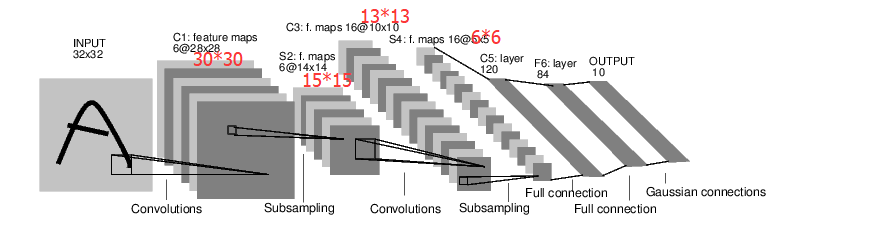

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3,padding=1)
        self.conv2 = nn.Conv2d(6, 16, 3,padding=1)
        # an affine operation: y = Wx + b
        #感觉错了,为啥是6不是5
        self.fc1 = nn.Linear(16 * 8 * 8, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x=F.relu(self.conv1(x))
        print("conv1--size=",x.size())
        x = F.max_pool2d(x, (2, 2))
        print("pool1--size=",x.size())
        # If the size is a square you can only specify a single number
        x=F.relu(self.conv2(x))
        print("conv2--size=",x.size())
        x = F.max_pool2d(x, 2)
        print("pool2--size=",x.size())
        x = x.view(-1, self.num_flat_features(x))
        print("flat_features--size=",x.size())
        x = F.relu(self.fc1(x))
        print("fc1--size=",x.size())
        x = F.relu(self.fc2(x))
        print("fc2--size=",x.size())
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [31]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [32]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

conv1--size= torch.Size([1, 6, 32, 32])
pool1--size= torch.Size([1, 6, 16, 16])
conv2--size= torch.Size([1, 16, 16, 16])
pool2--size= torch.Size([1, 16, 8, 8])
flat_features--size= torch.Size([1, 1024])
fc1--size= torch.Size([1, 120])
fc2--size= torch.Size([1, 84])
tensor([[ 0.0652, -0.1303,  0.0289,  0.0366,  0.1169,  0.0160, -0.1135, -0.0053,
         -0.0529,  0.0688]], grad_fn=<AddmmBackward>)


In [33]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [34]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

conv1--size= torch.Size([1, 6, 32, 32])
pool1--size= torch.Size([1, 6, 16, 16])
conv2--size= torch.Size([1, 16, 16, 16])
pool2--size= torch.Size([1, 16, 8, 8])
flat_features--size= torch.Size([1, 1024])
fc1--size= torch.Size([1, 120])
fc2--size= torch.Size([1, 84])
tensor(1.8675, grad_fn=<MseLossBackward>)


In [35]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [36]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0004, -0.0129, -0.0219,  0.0085, -0.0053, -0.0107])


In [37]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [38]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

conv1--size= torch.Size([1, 6, 32, 32])
pool1--size= torch.Size([1, 6, 16, 16])
conv2--size= torch.Size([1, 16, 16, 16])
pool2--size= torch.Size([1, 16, 8, 8])
flat_features--size= torch.Size([1, 1024])
fc1--size= torch.Size([1, 120])
fc2--size= torch.Size([1, 84])
